# **Machine learning project for forecasting Christmas seasonal sales in a textile industry**

**Objective: To forecast daily sales, by factory and by product throughout the month of December.**

*Some technical details:*
- Use of PyCaret and Pandas libraries;
- Implementation of a machine learning model with a supervised approach;
- Adoption of a multivariate regression model;
- Exploration of methods, with a main focus on Ensemble Decision Trees and Gradient Boosting;
- Evaluation of models, mainly LightGBM, XGBoost, Random Forest (RF), Gradient Boosting Regressor (GBR), and Extra Trees (ET).

*Database:*

- Total records: 33,044

- Columns:
data (datetime);
ID_fabrica (int64);
ID_prod (int64);
vendas (int64)

- Categorical (or qualitative) variables: ID_fabrica, ID_prod
- Numerical (quantitative) variables: vendas


Download in: https://bit.ly/dataset0011.

In [32]:
# Instalar a biblioteca PyCaret:

!pip install pycaret

In [33]:
# Em caso de problemas com os pacotes fastapi, python-multipart e uvicorn ao instalar o PyCaret, instalar separadamente:

#!pip install fastapi python-multipart uvicorn

In [34]:
# Em caso de problemas com os pacotes acima, principalmente com o tensorflow e fastapi, instalar separadamente, se necessário:

#!pip uninstall typing-extensions
#!pip install typing-extensions==4.5.0
#!pip uninstall tensorflow-probability
#!pip install tensorflow-probability>=0.24.0
#!pip install fastapi

In [35]:
# Importar bibliotecas necessárias:

import pandas as pd
from pycaret.regression import *

In [36]:
# Eliminar os warnings das bibliotecas:

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [37]:
# Importar a bilioteca 'os' para interagir com o sistema operacional, nesse caso para deletar o dataset carregado anteriormente, caso tenha, por outro novo, diferente, mais atual:

import os

# Especifique o nome do arquivo que você deseja excluir
nome_do_arquivo = 'vendas_fabrica.xlsx'

# Verifique se o arquivo existe antes de excluí-lo
if os.path.exists(nome_do_arquivo):
    os.remove(nome_do_arquivo)
    print(f'O arquivo {nome_do_arquivo} foi excluído com sucesso.')
else:
    print(f'O arquivo {nome_do_arquivo} não existe.')

O arquivo vendas_fabrica.xlsx foi excluído com sucesso.


In [38]:
# Utilizar a funcionalidade de files do Google Colab para interagir com o dataset que foi carregado anteriormente:

from google.colab import files
uploaded = files.upload()

# Ler o arquivo Excel:

data = pd.read_excel('vendas_fabrica.xlsx')

Saving vendas_fabrica.xlsx to vendas_fabrica.xlsx


In [39]:
# Informações sobre os campos do dataset:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33043 entries, 0 to 33042
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        33043 non-null  datetime64[ns]
 1   ID_fabrica  33043 non-null  int64         
 2   ID_prod     33043 non-null  int64         
 3   vendas      33043 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.0 MB


In [40]:
# Inicializar o ambiente PyCaret permitindo que o PyCaret defina a base de teste e treino:

exp1 = setup(data, target='vendas', categorical_features=['ID_fabrica', 'ID_prod'], date_features=['data'])

# Ou inicializar o ambiente PyCaret com a definição manual dos conjuntos de treinamento e teste
# Divisão temporal simples:

#data_treino = data[data['data'] <= '2022-12-31']
#data_teste = data[data['data'] > '2022-12-31']

#exp1 = setup(data_treino, test_data=data_teste, target='vendas', categorical_features=['ID_fabrica', 'ID_prod'], date_features=['data'], train_size=0.878233)

,Description,Value
0,Session id,1956
1,Target,vendas
2,Target type,Regression
3,Original data shape,"(33043, 4)"
4,Transformed data shape,"(33043, 22)"
5,Transformed train set shape,"(23130, 22)"
6,Transformed test set shape,"(9913, 22)"
7,Date features,1
8,Categorical features,2
9,Preprocess,True


In [41]:
# Comparar diferentes modelos e ranqueá-los pela métrica R2 (por padrão):

best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,4.5397,120.1843,10.8093,0.5018,0.7071,1.3471,0.7110
xgboost,Extreme Gradient Boosting,5.0060,148.7130,12.0583,0.3788,0.7583,1.4752,0.6430
rf,Random Forest Regressor,4.9456,169.6715,12.8917,0.2847,0.7213,1.3719,6.9160
gbr,Gradient Boosting Regressor,5.4965,175.4186,13.1129,0.2725,0.8075,1.6805,1.6270
br,Bayesian Ridge,6.8975,231.2685,15.0890,0.0344,1.0244,2.5395,0.2940
lr,Linear Regression,6.9070,231.2765,15.0895,0.0343,1.0254,2.5426,1.8800
ridge,Ridge Regression,6.9069,231.2763,15.0895,0.0343,1.0254,2.5426,0.2520
lar,Least Angle Regression,6.9070,231.2765,15.0895,0.0343,1.0254,2.5426,0.1680
en,Elastic Net,6.9002,233.4804,15.1600,0.0254,1.0168,2.5603,0.1670
llar,Lasso Least Angle Regression,6.8972,233.7795,15.1697,0.0242,1.0162,2.5618,0.1720


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [42]:
# Visualizar os hiperparâmetros do melhor modelo:

plot_model(best, plot='parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


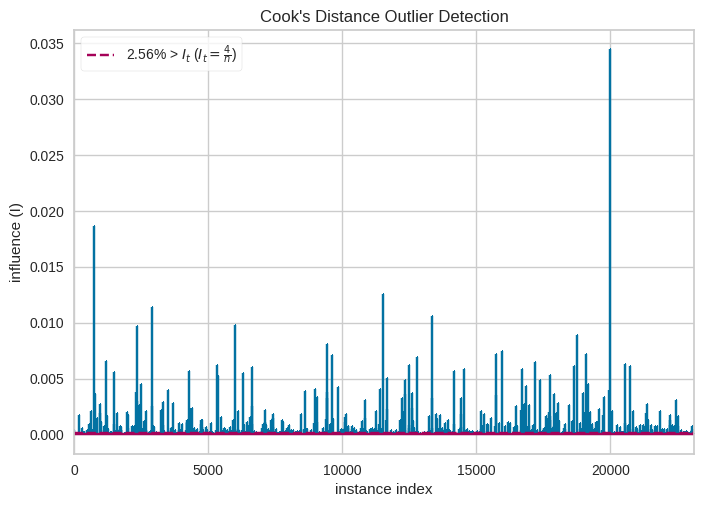

In [43]:
# Visualizar distribuição dos outliers dos dados do melhor modelo:

plot_model(best, plot='cooks')

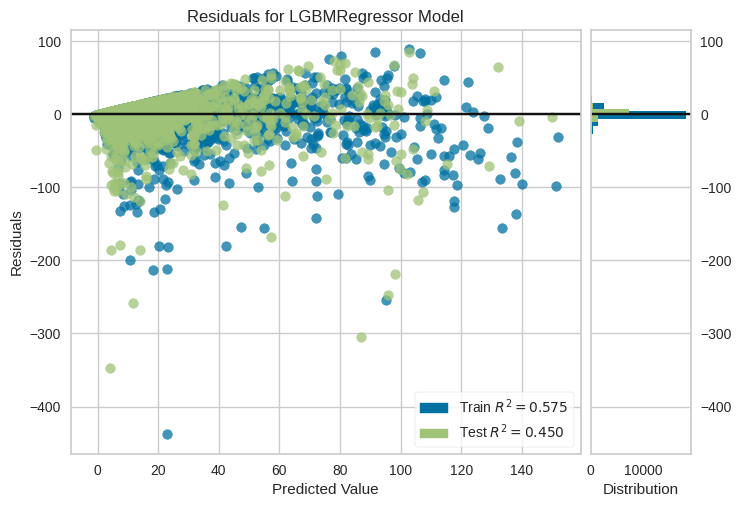

In [44]:
# Plotar os dados residuais, ou seja, o erro na estimativa do modelo:
# Resíduos positivos é subestimação. Negativos é superestimação. Próximo de zero indica boas previsões.

plot_model(best, plot = 'residuals')

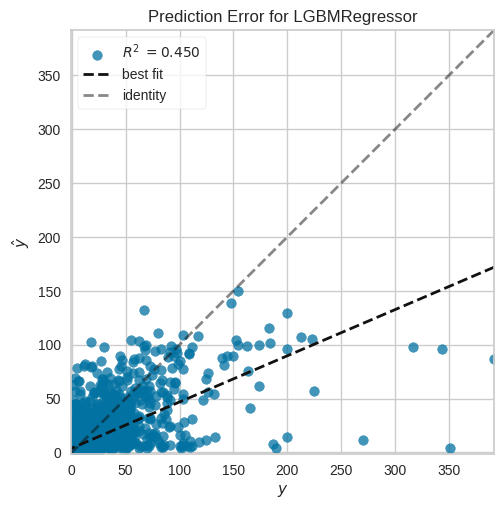

In [45]:
# Plotar a tendência do erro do modelo:

plot_model(best, plot = 'error')

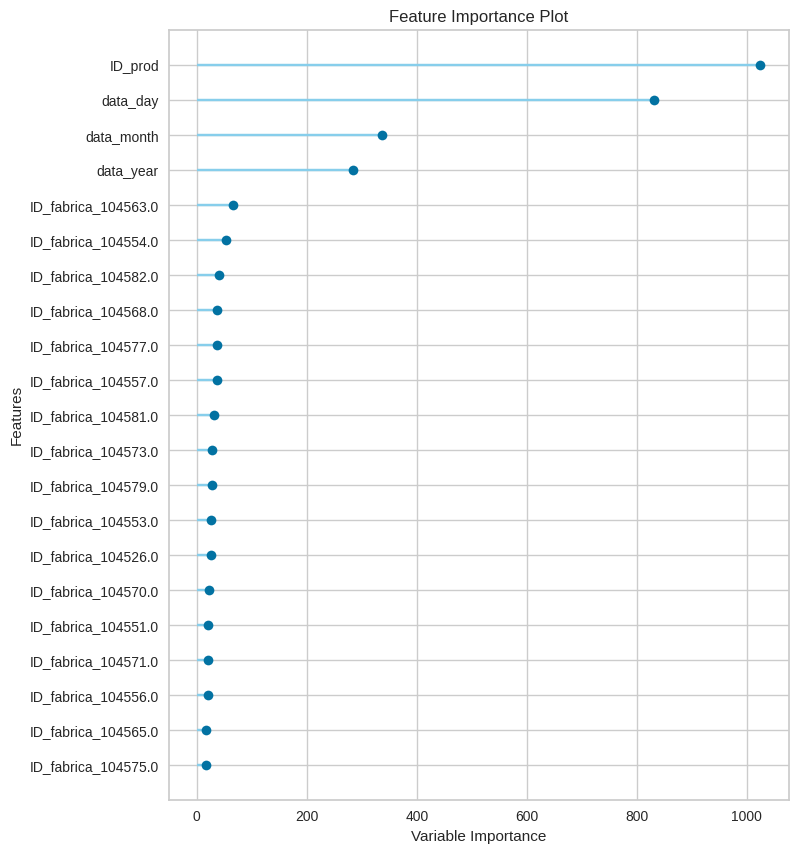

In [46]:
# Plotar as principais features e sua importância no modelo:

plot_model(best, plot = 'feature_all')

In [47]:
# Criar o modelo com base no melhor modelo escolhido:

model = create_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.3990,124.5847,11.1618,0.4542,0.6957,1.3199
1,4.6648,109.7926,10.4782,0.6022,0.7229,1.4181
2,4.5268,96.0044,9.7982,0.5724,0.7070,1.3490
3,4.5845,87.9701,9.3792,0.4754,0.7232,1.4002
4,4.6355,120.2141,10.9642,0.5238,0.7193,1.4001
5,4.5308,113.4922,10.6533,0.5665,0.7088,1.3812
6,4.3179,92.9104,9.6390,0.5470,0.7023,1.3472
7,4.5607,119.9050,10.9501,0.5537,0.6766,1.2218
8,4.7862,253.0188,15.9066,0.3111,0.6980,1.2326


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
# Treinar o modelo:

trained_model = finalize_model(model)

In [49]:
# Criar um dataframe com as datas a serem previstas:

dates_to_predict = pd.date_range(start='2023-12-01', end='2023-12-31', freq='D')
predictions_data = pd.DataFrame({'data': dates_to_predict})

In [50]:
# Listas de lojas e produtos para previsão:

fabricas_desejadas = [
    104526,
    104551,
    104553,
    104554,
    104556,
    104557,
    104563,
    104565,
    104568,
    104570,
    104571,
    104573,
    104575,
    104577,
    104579,
    104581,
    104582
]
produtos_desejados = [
    1202033101,
    1205005701,
    1205005901,
    1205012201,
    1205012501,
    1205012601,
    1205013201,
    1205014301,
    1205015201,
    1205015301,
    1205015401,
    1205015501,
    1205015601,
    1205015701,
    1205015801,
    1205015901,
    1205016001,
    1205016101,
    1205016201,
    1205016301,
    1205016401,
    1205016501,
    1205016601,
    1205016701,
    1205016801,
    1205016901,
    1205017001
    ]

In [51]:
# Replicar as datas para cada combinação de fábrica e produto:

predictions_data = predictions_data.loc[predictions_data.index.repeat(len(fabricas_desejadas) * len(produtos_desejados))].reset_index(drop=True)


In [52]:
# Criar todas as combinações de fábrica e produto para o período desejado:

combinacoes = [(data, fabrica, produto) for data in dates_to_predict for fabrica in fabricas_desejadas for produto in produtos_desejados]

In [53]:
# Criar DataFrame com as combinações:

predictions_data = pd.DataFrame(combinacoes, columns=['data', 'ID_fabrica', 'ID_prod'])


In [54]:
# Prever as vendas para as datas específicas, fábricas e produtos:

predictions = predict_model(trained_model, data=predictions_data)

In [55]:
# Exibir uma visão resumida das previsões:

print(predictions[['data', 'ID_fabrica', 'ID_prod', 'prediction_label']])

            data  ID_fabrica     ID_prod  prediction_label
0     2023-12-01      104526  1202033101          3.082283
1     2023-12-01      104526  1205005701          5.541873
2     2023-12-01      104526  1205005901          4.781294
3     2023-12-01      104526  1205012201          2.585844
4     2023-12-01      104526  1205012501         26.938235
...          ...         ...         ...               ...
14224 2023-12-31      104582  1205016601          7.891252
14225 2023-12-31      104582  1205016701          3.072117
14226 2023-12-31      104582  1205016801          3.072117
14227 2023-12-31      104582  1205016901          2.848795
14228 2023-12-31      104582  1205017001          2.848795

[14229 rows x 4 columns]


In [56]:
# Deletar o arquivo anterior para salvar um novo, mais atualizado. Especifique o nome do arquivo que você deseja excluir:

nome_do_arquivo = 'Predicao_Fabricas.xlsx'

# Verifique se o arquivo existe antes de excluí-lo:

if os.path.exists(nome_do_arquivo):
    os.remove(nome_do_arquivo)
    print(f'O arquivo {nome_do_arquivo} foi excluído com sucesso.')
else:
    print(f'O arquivo {nome_do_arquivo} não existe.')

O arquivo Predicao_Fabricas.xlsx foi excluído com sucesso.


In [57]:
# Salvar as previsões em um arquivo Excel:

predictions.to_excel('Predicao_Fabricas.xlsx', index=False)

In [58]:
# Salvar o modelo:

save_model(best, 'Forecast_Regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['data'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=[], transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['ID_fabrica', 'ID_prod'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['ID_fabrica'],
                                     transformer=OneHotEncoder(cols=['ID_fabrica'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['ID_prod'],
      